## Image Proccessing
Menggunakan algoritma Canny, yang mendeteksi tepi dengan cara menghitung gradien intensitas dan menerapkan ambang batas.

Parameter threshold1 dan threshold2 menentukan sensitivitas deteksi tepi.


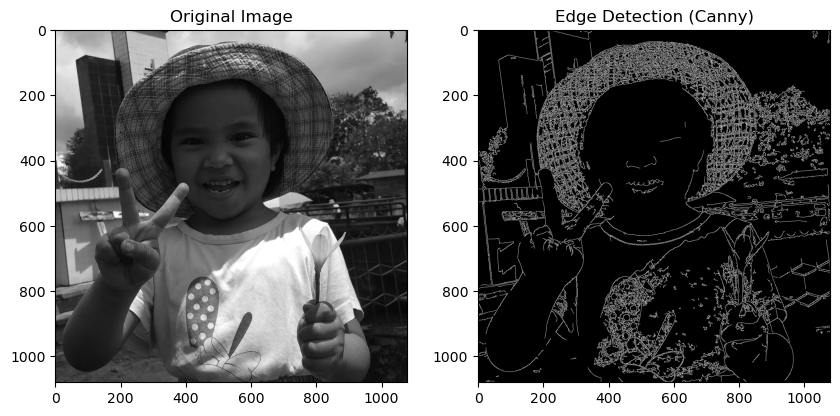

In [1]:
import cv2
import matplotlib.pyplot as plt

# Membaca gambar
image = cv2.imread('foto.jpg', cv2.IMREAD_GRAYSCALE)

# Deteksi tepi menggunakan Canny
edges = cv2.Canny(image, threshold1=50, threshold2=150)

# Menampilkan gambar asli dan hasil deteksi tepi
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Edge Detection (Canny)")
plt.imshow(edges, cmap='gray')
plt.show()


## Edge Detection (Menggunakan Sobel)

Sobel Filter:
Efektif dalam mendeteksi perubahan arah secara terpisah, baik horizontal maupun vertikal.
Gabungan dari kedua arah ini menghasilkan kontur yang lebih halus dibandingkan dengan deteksi yang hanya menggunakan satu arah.

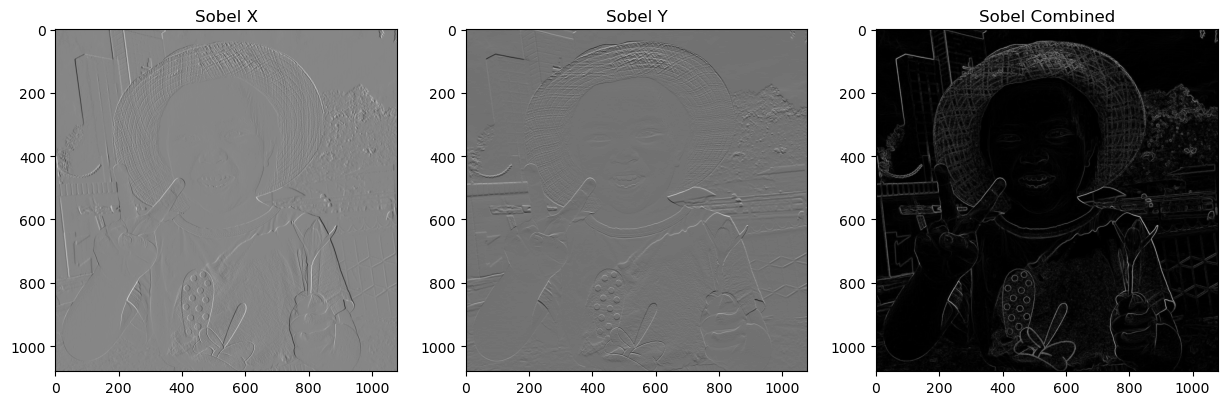

In [3]:
# Membaca gambar dalam skala abu-abu
image = cv2.imread('foto.jpg', cv2.IMREAD_GRAYSCALE)

# Menghitung gradien Sobel
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)  # Gradien arah horizontal
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)  # Gradien arah vertikal

# Menggabungkan gradien
sobel_combined = cv2.magnitude(sobel_x, sobel_y)

# Menampilkan hasil
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title("Sobel X")
plt.imshow(sobel_x, cmap='gray')

plt.subplot(1, 3, 2)
plt.title("Sobel Y")
plt.imshow(sobel_y, cmap='gray')

plt.subplot(1, 3, 3)
plt.title("Sobel Combined")
plt.imshow(sobel_combined, cmap='gray')
plt.show()


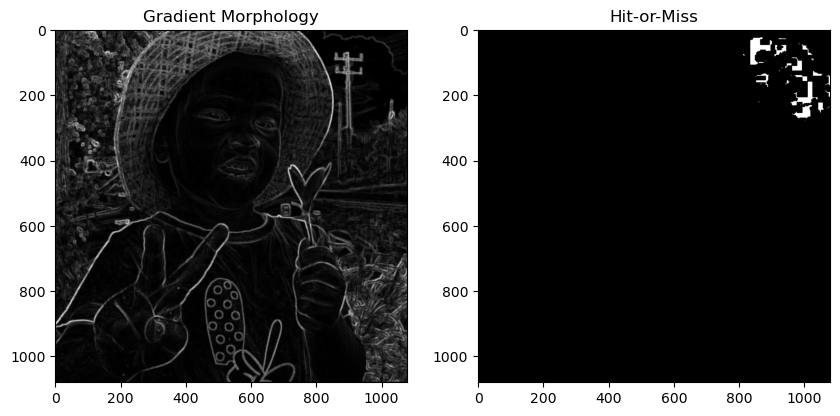

In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Membaca gambar biner
binary_image = cv2.imread(r'C:\Users\ASUS VivoBook COREi7\PM (Mechine Learning)\WEEK 13\11422024_Image Processing\11422058_Image Processing\dua.jpg', cv2.IMREAD_GRAYSCALE)

# Memeriksa apakah gambar berhasil dimuat
if binary_image is None:
    print("Gambar tidak ditemukan. Periksa jalur file.")
else:
    # Membuat kernel untuk operasi morfologi
    kernel = np.ones((5, 5), np.uint8)

    # Gradien morfologi
    gradient = cv2.morphologyEx(binary_image, cv2.MORPH_GRADIENT, kernel)

    # Hit-or-Miss (deteksi bentuk tertentu)
    # Membuat kernel untuk pola
    hit_miss_kernel = np.array([[0, 1, 0],
                                [1, 1, 1],
                                [0, 1, 0]], dtype=np.uint8)

    # Hit-or-Miss hanya bekerja pada gambar biner 0 dan 1
    binary = binary_image // 255  # Normalisasi ke 0-1
    hit_or_miss = cv2.morphologyEx(binary, cv2.MORPH_HITMISS, hit_miss_kernel)

    # Menampilkan hasil
    plt.figure(figsize=(10, 5))

    # Subplot untuk Gradient Morphology
    plt.subplot(1, 2, 1)
    plt.title("Gradient Morphology")
    plt.imshow(gradient, cmap='gray')

    # Subplot untuk Hit-or-Miss
    plt.subplot(1, 2, 2)
    plt.title("Hit-or-Miss")
    plt.imshow(hit_or_miss, cmap='gray')

    # Menampilkan grafik
    plt.show()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 40s 4us/step


C:\Users\ASUS VivoBook COREi7\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8819 - loss: 0.4282
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 994us/step - accuracy: 0.9642 - loss: 0.1210
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9775 - loss: 0.0768
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9839 - loss: 0.0538
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9878 - loss: 0.0402  
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step - accuracy: 0.9733 - loss: 0.0824
Test Accuracy: 0.98
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Predicted label: 7


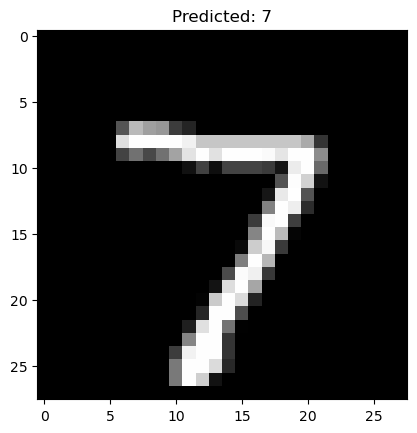

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# 1. Memuat dataset MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 2. Normalisasi data (0-255 menjadi 0-1)
x_train = x_train / 255.0
x_test = x_test / 255.0

# 3. Membuat model Neural Network
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Mengubah gambar 2D menjadi vektor 1D
    Dense(128, activation='relu'),  # Hidden layer dengan 128 neuron
    Dense(10, activation='softmax') # Output layer dengan 10 kelas (angka 0-9)
])

# 4. Kompilasi model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 5. Melatih model
model.fit(x_train, y_train, epochs=5, batch_size=32)

# 6. Evaluasi model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

# 7. Memprediksi satu gambar
predictions = model.predict(x_test)
predicted_label = tf.argmax(predictions[0])
print(f"Predicted label: {predicted_label.numpy()}")

# Menampilkan gambar dengan prediksi
plt.imshow(x_test[0], cmap='gray')
plt.title(f"Predicted: {predicted_label.numpy()}")
plt.show()
